In [23]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

In [4]:
data = pd.read_csv('LungCancerDataset.csv')
data = data.drop(columns=["ENERGY_LEVEL", "OXYGEN_SATURATION"])
le = LabelEncoder()
data['PULMONARY_DISEASE'] = le.fit_transform(data['PULMONARY_DISEASE'])

data.head(10)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0
1,81,1,1,0,0,1,1,1,1,0,1,0,0,0,0,1
2,58,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0
3,44,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1
4,72,0,1,1,1,1,1,0,1,0,1,0,0,0,0,1
5,37,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1
6,50,0,1,1,1,0,1,1,1,1,0,0,0,0,1,0
7,68,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0
8,48,0,1,1,0,1,1,1,1,0,1,1,0,0,0,1
9,52,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0


In [5]:
X = data.drop("PULMONARY_DISEASE", axis=1)
y = data["PULMONARY_DISEASE"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (4000, 15), Test shape: (1000, 15)


In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', n_estimators=50, use_label_encoder=False)
}
results = {}

In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }

C:\Users\Zalán\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:53:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [18]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)
best_model_name = results_df.index[0]
best_model = models[best_model_name]

print(f"\n🏆 Legjobb modell: {best_model_name}")
print(f"Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f}")
print(f"Precision: {results_df.loc[best_model_name, 'Precision']:.4f}")
print(f"Recall: {results_df.loc[best_model_name, 'Recall']:.4f}")
print(f"F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"ROC-AUC: {results_df.loc[best_model_name, 'ROC-AUC']:.4f}")
print("\nModel Evaluation:")
print(results_df)


🏆 Legjobb modell: Logistic Regression
Accuracy: 0.8580
Precision: 0.8032
Recall: 0.8624
F1-Score: 0.8318
ROC-AUC: 0.9098

Model Evaluation:
                        Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression        0.858   0.803204  0.862408  0.831754  0.909758
Support Vector Machine     0.843   0.761506  0.894349  0.822599  0.908768
XGBoost                    0.843   0.807882  0.805897  0.806888  0.888345
SVM                        0.843   0.761506  0.894349  0.822599  0.908768
Random Forest              0.838   0.813299  0.781327  0.796992  0.891699
K-Nearest Neighbors        0.757   0.682222  0.754300  0.716453  0.812926
KNN                        0.757   0.682222  0.754300  0.716453  0.812926


In [17]:
joblib.dump(best_model, "best_model.pkl")
print("✅ A legjobb modell elmentve: best_model.pkl")

✅ A legjobb modell elmentve: best_model.pkl


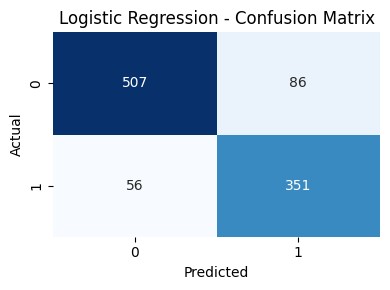

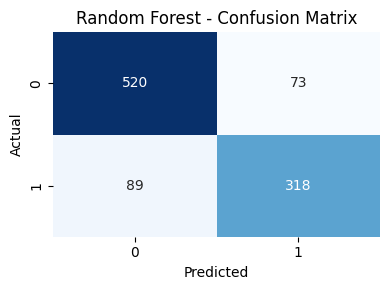

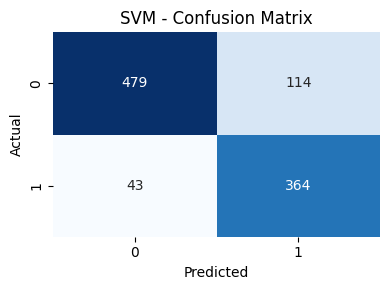

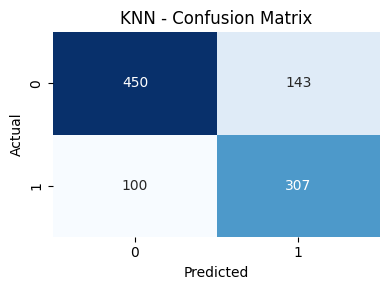

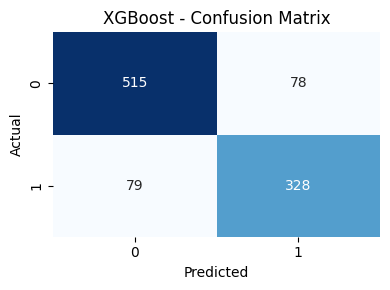

In [20]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

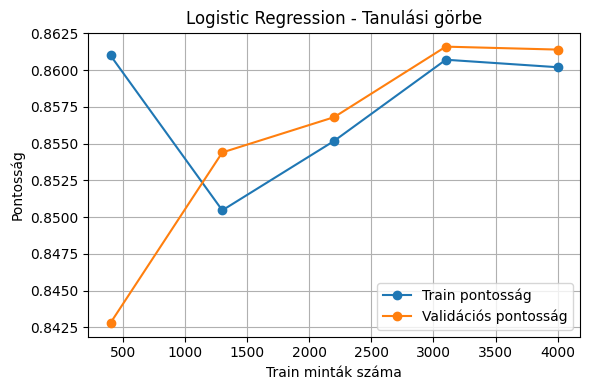

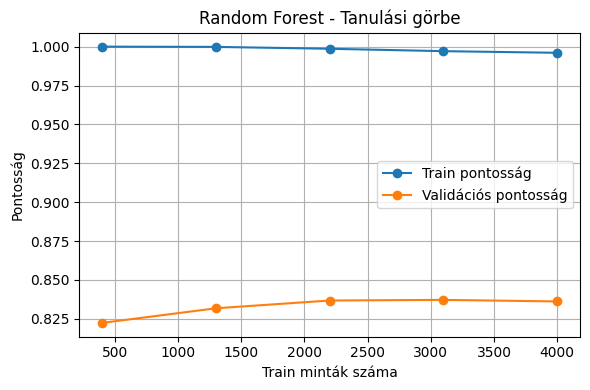

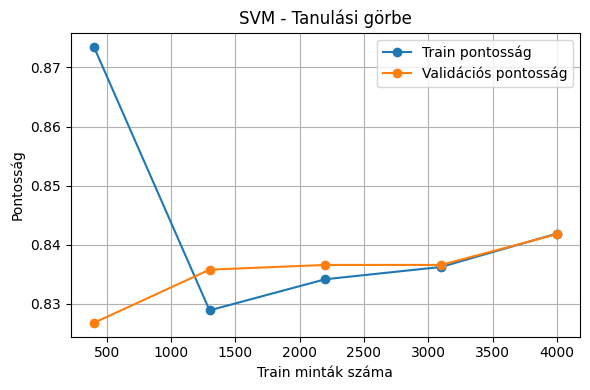

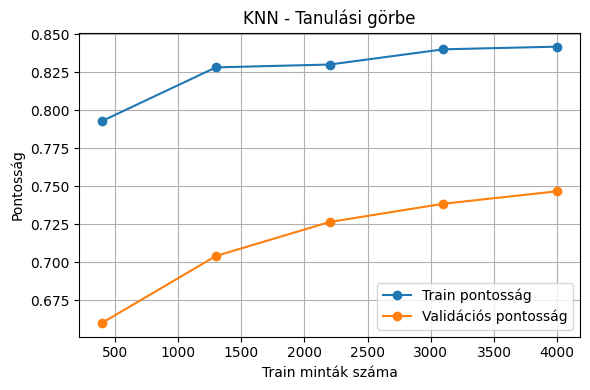

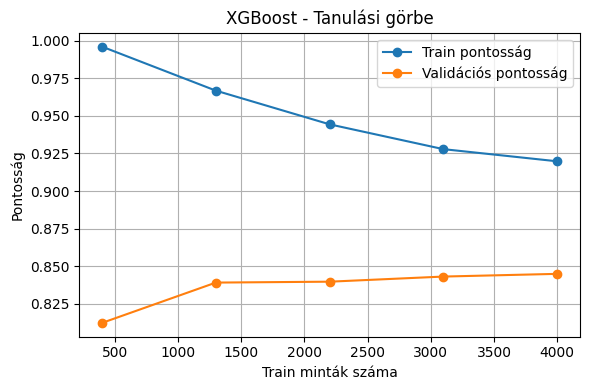

In [24]:
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel("Train minták száma")
    plt.ylabel("Pontosság")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy', n_jobs=n_jobs, train_sizes=train_sizes
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label="Train pontosság")
    plt.plot(train_sizes, test_mean, 'o-', label="Validációs pontosság")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(models["Logistic Regression"], "Logistic Regression - Tanulási görbe", X, y)
plot_learning_curve(models["Random Forest"], "Random Forest - Tanulási görbe", X, y)
plot_learning_curve(models["SVM"], "SVM - Tanulási görbe", X, y)
plot_learning_curve(models["KNN"], "KNN - Tanulási görbe", X, y)
plot_learning_curve(models["XGBoost"], "XGBoost - Tanulási görbe", X, y)